In [6]:
#!sudo -S apt-get install unzip < ../mypass.txt

In [ ]:
#conda install numpy scipy
#conda install scikit-learn
#conda install numba

In [ ]:
#!sudo -S pip install numba < ../mypass.txt
#!sudo -S pip install umap-learn < ../mypass.txt

In [13]:
#!sudo -S apt-get install git < ../mypass.txt -y

In [15]:
#!git clone https://github.com/MLWave/kepler-mapper

Cloning into 'kepler-mapper'...
remote: Counting objects: 1318, done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 1318 (delta 51), reused 66 (delta 38), pack-reused 1231
Receiving objects: 100% (1318/1318), 4.83 MiB | 1.78 MiB/s, done.
Resolving deltas: 100% (767/767), done.
Checking connectivity... done.


In [30]:
#cd kepler-mapper

/home/rnd/work/beconstant/notebooks/kepler-mapper


In [31]:
#!sudo -S pip install -e . < ../../mypass.txt

[sudo] password for rnd: The directory '/home/rnd/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/rnd/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
Obtaining file:///home/rnd/work/beconstant/notebooks/kepler-mapper
  Found existing installation: kmapper 1.1.3
    Can't uninstall 'kmapper'. No files were found to uninstall.
  Running setup.py develop for kmapper
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
#!sudo -S pip install umap-learn < ../mypass.txt

[sudo] password for rnd: The directory '/home/rnd/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/rnd/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
  Running setup.py install for umap-learn ... done
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [106]:
import IPython
import sklearn
import numpy as np
import kmapper as km
import pandas as pd
import seaborn as sns
from umap import UMAP

from sklearn.manifold import t_sne, isomap

from sklearn import datasets
from sklearn.cluster import DBSCAN

from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [2]:
def display(path_html="mapper_visualization_output.html"):
    """ Displays a html file inside a Jupyter Notebook output cell.
    
    Parameters
    ----------
    path_html : str
        Path to html. Use file name for file inside current working 
        directory. Use `file://` browser url-format for path to local file.
        Use `https://` urls for externally hosted resources.

    Notes
    -----
    Thanks to https://github.com/smartinsightsfromdata for the issue:
    https://github.com/MLWave/kepler-mapper/issues/10

    """

    iframe = '<iframe src=' + path_html \
            + ' width=100%% height=800 frameBorder="0"></iframe>'
    IPython.core.display.display(IPython.core.display.HTML(iframe))

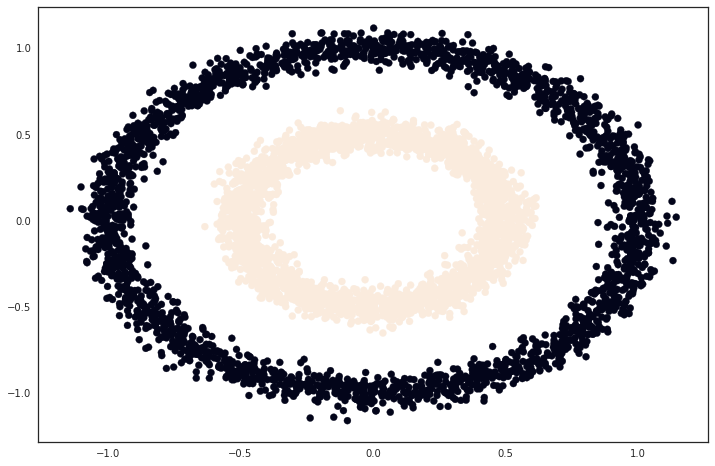

In [8]:
data, labels = datasets.make_circles(n_samples=5000, noise=0.05, factor=0.5, random_state=42)

plt.scatter(*data.T, c=labels)

..Composing projection pipeline length 1:
Projections: [0, 1]


Distance matrices: False


Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))


..Projecting on data shaped (5000, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



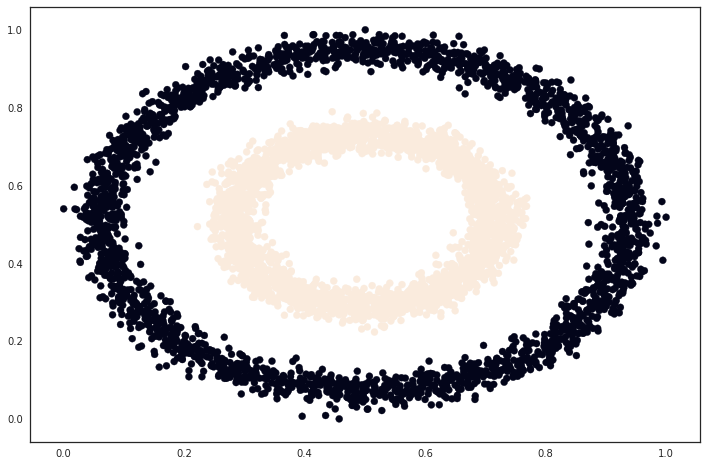

In [9]:
# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0, 1]) # X-Y axis
plt.scatter(*projected_data.T, c=labels)

In [10]:
# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, clusterer=DBSCAN(eps=0.2), nr_cubes=10, overlap_perc=0.1)

# Visualize it
html = mapper.visualize(graph, inverse_X=data, inverse_X_names=['x0', 'x1'],
                        path_html="test_kepler_mapper_on_cocentric_circles.html",
                        title="test_kepler_mapper_on_cocentric_circles")

# Inline display
# jupyter.display(path_html="http://mlwave.github.io/tda/word2vec-gender-bias.html")
#jupyter.display(path_html="make_circles_keplermapper_output.html")

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 168 edges and 83 nodes in 0:00:00.128455.
Wrote visualization to: test_kepler_mapper_on_cocentric_circles.html


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
#display(path_html="test_kepler_mapper_on_cocentric_circles.html")

### Linked circles

Text(0.5,0,'z')

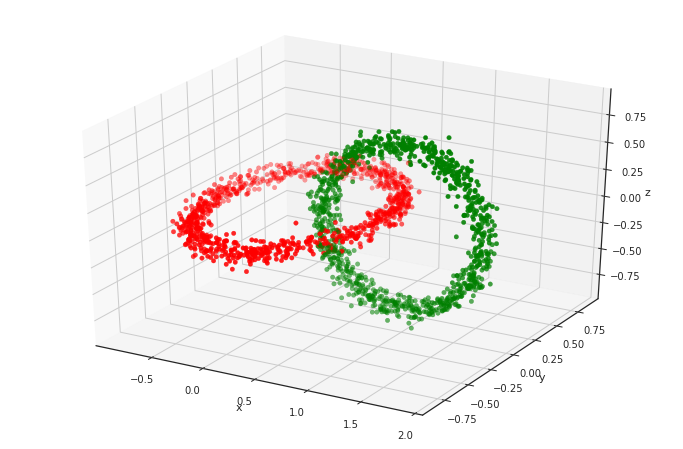

In [13]:
# Some sample data
#from sklearn import datasets
#data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)
c1 = np.array([0, 0, 0])
c2 = np.array([1, 0, 0])

r1, r2 = 0.75, 0.75
size = 1000
angle1, angle2 = np.random.random(size=size), np.random.random(size=size)

x1, y1, z1 = r1 * np.cos(2 * np.pi * angle1), r2 * np.sin(2 * np.pi * angle1), np.zeros(size)
x2, y2, z2 = r2 * np.cos(2 * np.pi * angle2), np.zeros(size), r2 * np.sin(2 * np.pi * angle2)

data1, data2 = np.c_[x1, y1, z1], np.c_[x2, y2, z2]
error = 0.05
data1, data2 = data1 + c1 + np.random.normal(scale=error, size=data1.shape), data2 + c2 + np.random.normal(scale=error, size=data2.shape)
data, labels = np.concatenate([data1, data2], axis=0), np.repeat([0, 1], [len(data1), len(data2)])
perm = np.random.permutation(len(data))
data = data[perm].copy()
labels = labels[perm].copy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(20, 80)
ax.scatter3D(*data.T, c=np.array(['r', 'g'])[labels])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.scatter3D(*data.T, c=np.ones(len(data1)))

In [ ]:
# Initialize
mapper = km.KeplerMapper(verbose=1)

In [17]:
projected_umap = mapper.fit_transform(data, UMAP(n_neighbors=40, n_components=2, min_dist=0.7, random_state=42))
projected_tsne = mapper.fit_transform(data, projection=t_sne.TSNE(n_components=2, perplexity=100, random_state=42))
projected_isomap = mapper.fit_transform(data, projection=isomap.Isomap(n_neighbors=5, n_components=2))

..Composing projection pipeline length 1:
Projections: UMAP(a=0.32081937132870464, alpha=1.0, angular_rp_forest=False,
   b=1.5629515580834514, bandwidth=1.0, gamma=1.0, init='spectral',
   local_connectivity=1.0, metric='euclidean', metric_kwds={},
   min_dist=0.7, n_components=2, n_epochs=None, n_neighbors=40,
   negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
   spread=1.0, verbose=False)


Distance matrices: False


Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))


..Projecting on data shaped (2000, 3)

..Projecting data using: 
	UMAP(a=0.32081937132870464, alpha=1.0, angular_rp_forest=False,
   b=1.5629515580834514, bandwidth=1.0, gamma=1.0, init='spectral',
   local_connectivity=1.0, metric='euclidean', metric_kwds={},
   min_dist=0.7, n_components=2, n_epochs=None, n_neighbors=40,
   negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
   spread=1.0, verbose=1)

Construct fuzzy simplicial set
Construct embedding
	completed  0  /  500 epochs
	compl

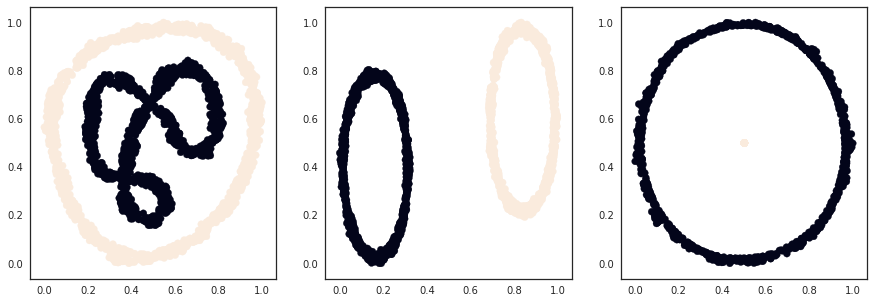

In [18]:
f, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(*projected_umap.T, c=labels)
axes[1].scatter(*projected_tsne.T, c=labels)
axes[2].scatter(*projected_isomap.T, c=labels)

In [19]:
# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_umap, data, clusterer=DBSCAN(eps=0.4), nr_cubes=10, overlap_perc=0.5)

# Visualize it
html = mapper.visualize(graph,
                 path_html="tied_circles_umap2d.html",
                 inverse_X=data,
                 inverse_X_names=['x', 'y', 'z'],
                 projected_X=projected_umap, color_function=labels,
                 projected_X_names=['UMAP_comp_1', 'UMAP_comp_2'],
                 title="tied_circles(n_samples={})".format(len(data)))

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_tsne, data, clusterer=DBSCAN(eps=0.4), nr_cubes=10, overlap_perc=0.5)

# Visualize it
html = mapper.visualize(graph,
                 path_html="tied_circles_tsne2d.html",
                 inverse_X=data,
                 inverse_X_names=['x', 'y', 'z'],
                 projected_X=projected_tsne, color_function=labels,
                 projected_X_names=['TSNE_comp_1', 'TSNE_comp_2'],
                 title="tied_circles(n_samples={})".format(len(data)))

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_isomap, data, clusterer=DBSCAN(eps=0.4), nr_cubes=10, overlap_perc=0.5)

# Visualize it
html = mapper.visualize(graph,
                 path_html="tied_circles_isomap2d.html",
                 inverse_X=data,
                 inverse_X_names=['x', 'y', 'z'],
                 projected_X=projected_isomap, color_function=labels,
                 projected_X_names=['ISOMAP_comp_1', 'ISOMAP_comp_2'],
                 title="tied_circles(n_samples={})".format(len(data)))

Mapping on data shaped (2000, 3) using lens shaped (2000, 2)

Creating 100 hypercubes.

Created 211 edges and 102 nodes in 0:00:00.108697.
Wrote visualization to: tied_circles_umap2d.html
Mapping on data shaped (2000, 3) using lens shaped (2000, 2)

Creating 100 hypercubes.


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



Created 114 edges and 56 nodes in 0:00:00.071432.
Wrote visualization to: tied_circles_tsne2d.html
Mapping on data shaped (2000, 3) using lens shaped (2000, 2)

Creating 100 hypercubes.

Created 76 edges and 47 nodes in 0:00:00.072531.
Wrote visualization to: tied_circles_isomap2d.html


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
#display(path_html="tied_circles_umap2d.html")

In [21]:
#display(path_html="tied_circles_tsne2d.html")

In [22]:
#display(path_html="tied_circles_isomap2d.html")

In [6]:
creditcard_df = pd.read_csv('../dataset/creditcard.csv')

In [7]:
data, labels = creditcard_df.values[:, 1:-2], creditcard_df.Class

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


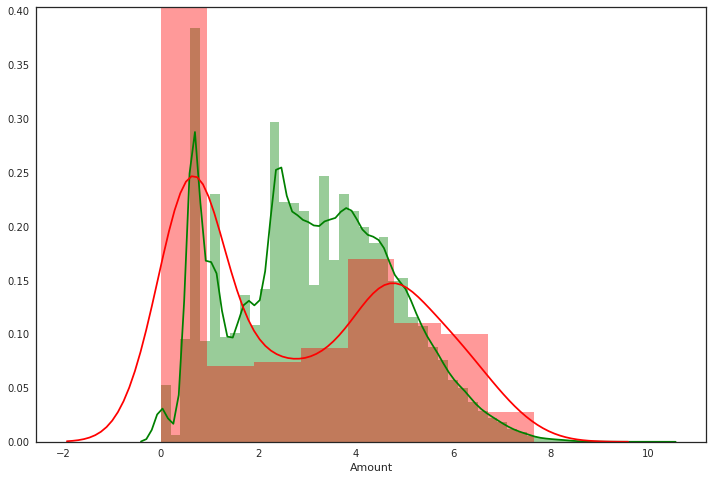

In [27]:
sns.distplot(creditcard_df.Amount[creditcard_df.Class == 0].map(np.log1p), color='g')
sns.distplot(creditcard_df.Amount[creditcard_df.Class == 1].map(np.log1p), color='r')

In [3]:
from time import time

In [4]:
mapper = km.KeplerMapper(verbose=1)

In [8]:
start = time()
projected_card_umap = mapper.fit_transform(data[:10000], UMAP(n_neighbors=20, n_components=2, min_dist=0.1, random_state=42, verbose=True))
end = time()
print('projection took {:.2f}s'.format(end - start))

UMAP(n_neighbors=20, n_components=2, metric='euclidean',  gamma=1.0, n_epochs=None, alpha=1.0, init='spectral', spread=1.0, min_dist=0.1, a=None, b=None, random_state=42, metric_kwds={}, verbose=True)
..Composing projection pipeline length 1:
Projections: UMAP(a=1.576943460405378, alpha=1.0, angular_rp_forest=False,
   b=0.8950608781227859, bandwidth=1.0, gamma=1.0, init='spectral',
   local_connectivity=1.0, metric='euclidean', metric_kwds={},
   min_dist=0.1, n_components=2, n_epochs=None, n_neighbors=20,
   negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
   spread=1.0, verbose=True)


Distance matrices: False


Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))


..Projecting on data shaped (10000, 28)

..Projecting data using: 
	UMAP(a=1.576943460405378, alpha=1.0, angular_rp_forest=False,
   b=0.8950608781227859, bandwidth=1.0, gamma=1.0, init='spectral',
   local_connectivity=1.0, metric='euclidean', metric_kwds={},
   min_dist=0.1, n_components=2, n_epochs=Non

In [16]:
time = creditcard_df.Time % 86400

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


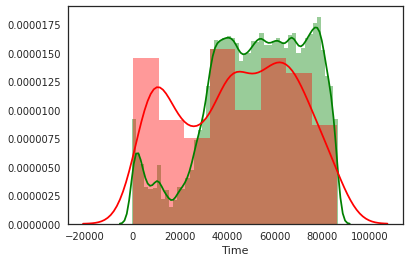

In [18]:
sns.distplot(time[creditcard_df.Class == 0], color='g')
sns.distplot(time[creditcard_df.Class == 1], color='r')

In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
train_size = 150000

In [24]:
time_cos, time_sin = np.cos(2 * np.pi * creditcard_df.Time / 86400), np.sin(2 * np.pi * creditcard_df.Time / 86400)

In [29]:
cred = creditcard_df.drop('Time', 1)
cred['time_cos'] = time_cos
cred['time_sin'] = time_sin
target = creditcard_df.Class
cred.drop('Class', axis=1, inplace=True)
cred.loc[:, 'Amount'] = cred.Amount.map(np.log1p)

In [49]:
cred_train, cred_test, target_train, target_test = cred[:train_size], cred[train_size:], target[:train_size], target[train_size:]

In [51]:
target_train.mean(), target_test.mean()

(0.0019533333333333334, 0.0014761844711328046)

In [52]:
isof = IsolationForest(n_estimators=200, contamination=target_train.mean(), n_jobs=-1, random_state=42)

In [53]:
isof.fit(cred_train.values)

IsolationForest(bootstrap=False, contamination=0.0019533333333333334,
        max_features=1.0, max_samples='auto', n_estimators=200, n_jobs=-1,
        random_state=42, verbose=0)

In [55]:
isof_score_train = isof.decision_function(cred_train.values)

In [56]:
isof_score_test = isof.decision_function(cred_test.values)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


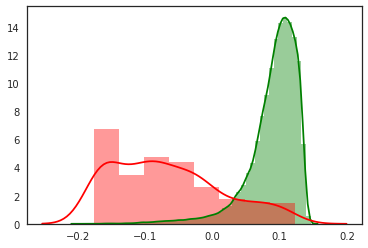

In [57]:
sns.distplot(isof_score_train[target_train == 0], color='g')
sns.distplot(isof_score_train[target_train == 1], color='r')

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


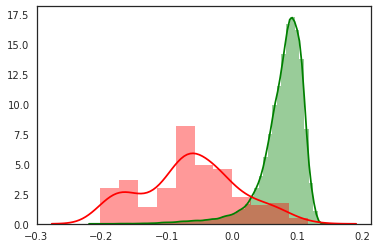

In [58]:
sns.distplot(isof_score_test[target_test == 0], color='g')
sns.distplot(isof_score_test[target_test == 1], color='r')

In [60]:
l2feature = np.linalg.norm(creditcard_df.values[:, 1:-2], axis=1)

In [62]:
l2feature_train, l2feature_test = l2feature[:train_size], l2feature[train_size:]

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


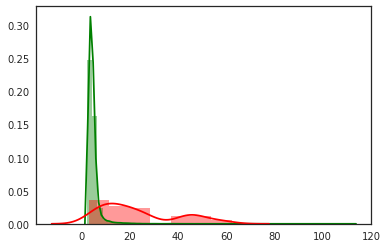

In [63]:
sns.distplot(l2feature_train[target_train == 0], color='g')
sns.distplot(l2feature_train[target_train == 1], color='r')

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


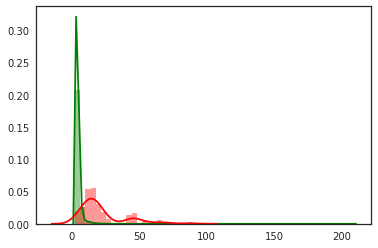

In [64]:
sns.distplot(l2feature_test[target_test == 0], color='g')
sns.distplot(l2feature_test[target_test == 1], color='r')

In [69]:
kekvals = creditcard_df.values[:, 1:-2].copy()
kekvals[...] = kekvals - kekvals.mean(axis=0, keepdims=True)
kekvals[...] = kekvals / kekvals.std(axis=0, keepdims=True)
l2kekfeature = np.linalg.norm(kekvals, axis=1)
l2kekfeature_train, l2kekfeature_test = l2kekfeature[:train_size], l2kekfeature[train_size:]

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


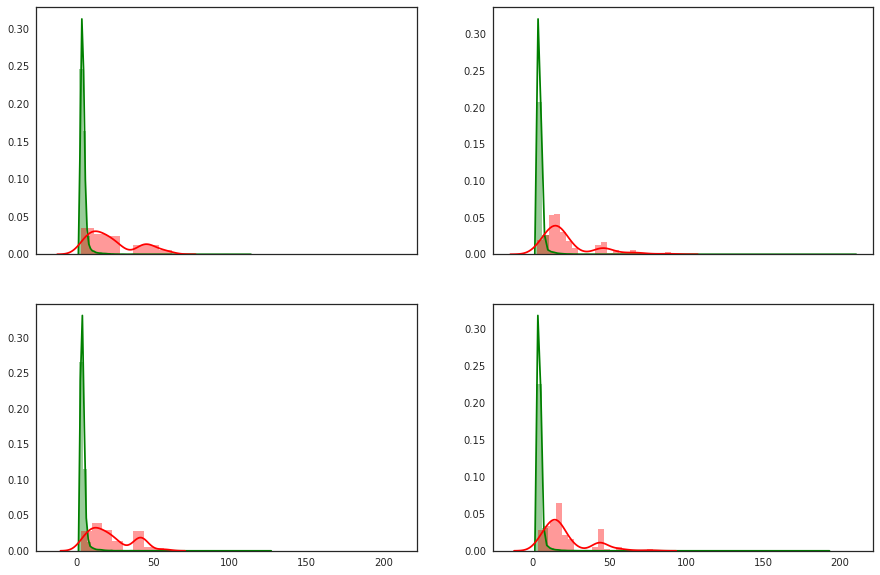

In [70]:
f, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 10))

sns.distplot(l2feature_train[target_train == 0], color='g', ax=axes[0][0])
sns.distplot(l2feature_train[target_train == 1], color='r', ax=axes[0][0])
sns.distplot(l2kekfeature_train[target_train == 0], color='g', ax=axes[1][0])
sns.distplot(l2kekfeature_train[target_train == 1], color='r', ax=axes[1][0])

sns.distplot(l2feature_test[target_test == 0], color='g', ax=axes[0][1])
sns.distplot(l2feature_test[target_test == 1], color='r', ax=axes[0][1])
sns.distplot(l2kekfeature_test[target_test == 0], color='g', ax=axes[1][1])
sns.distplot(l2kekfeature_test[target_test == 1], color='r', ax=axes[1][1])

In [109]:
mapper = km.KeplerMapper(verbose=2)

In [72]:
proj = np.c_[isof_score_train, l2kekfeature_train]

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
st_scaler = StandardScaler()
normalized_train = st_scaler.fit_transform(cred_train.values)
normalized_test = st_scaler.transform(cred_test.values)

In [100]:
from sklearn.cluster import AgglomerativeClustering

In [102]:
pred_train = isof.predict(normalized_train)

In [126]:
class IsofClusterer(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator):
    def __init__(self, dbscan_kwargs, isof_kwargs):
        self.dbscan_kwargs = dbscan_kwargs
        self.isof_kwargs = isof_kwargs
        self.isof = IsolationForest(**self.isof_kwargs)
        self.dbscan = DBSCAN(**self.dbscan_kwargs)
    
    def get_params(self, deep=True):
        params = {
            'dbscan_kwargs': self.dbscan_kwargs,
            'isof_kwargs': self.isof_kwargs
        }
        return params
    
    def fit(self, X):
        self.isof.fit(X)
        preds = self.isof.predict(X)
        X_isolated = X[preds == -1]
        if len(X_isolated) == 0:
            self.labels_ = np.zeros_like(preds)
        else:
            self.dbscan.fit(X_isolated)
            isolated_preds = self.dbscan.labels_
            uniq_isolated_preds = np.unique(isolated_preds)
            self.labels_ = (uniq_isolated_preds.max() + 1) * np.ones_like(preds)
            self.labels_[preds == -1] = isolated_preds
    
    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

In [131]:
# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(proj,
                   normalized_train,
                   clusterer=IsofClusterer(dbscan_kwargs={'eps': 0.5},
                                           isof_kwargs={'n_estimators': 200, 'contamination': target_train.mean()}),
                   nr_cubes=50,
                   overlap_perc=0.5)

Mapping on data shaped (150000, 31) using lens shaped (150000, 2)

Minimal points in hypercube before clustering: 1
Creating 2500 hypercubes.
There are 0 points in cube_0 / 2500
Cube_0 is empty.

There are 0 points in cube_1 / 2500
Cube_1 is empty.

There are 0 points in cube_2 / 2500
Cube_2 is empty.

There are 0 points in cube_3 / 2500
Cube_3 is empty.

There are 0 points in cube_4 / 2500
Cube_4 is empty.

There are 0 points in cube_5 / 2500
Cube_5 is empty.

There are 0 points in cube_6 / 2500
Cube_6 is empty.

There are 0 points in cube_7 / 2500
Cube_7 is empty.

There are 0 points in cube_8 / 2500
Cube_8 is empty.

There are 0 points in cube_9 / 2500
Cube_9 is empty.

There are 0 points in cube_10 / 2500
Cube_10 is empty.

There are 0 points in cube_11 / 2500
Cube_11 is empty.

There are 0 points in cube_12 / 2500
Cube_12 is empty.

There are 0 points in cube_13 / 2500
Cube_13 is empty.

There are 0 points in cube_14 / 2500
Cube_14 is empty.

There are 0 points in cube_15 / 2500
C

Found 0 clusters in cube_163

There are 8 points in cube_164 / 2500
Found 1 clusters in cube_164

There are 10 points in cube_165 / 2500
Found 1 clusters in cube_165

There are 7 points in cube_166 / 2500
Found 1 clusters in cube_166

There are 3 points in cube_167 / 2500
Found 1 clusters in cube_167

There are 0 points in cube_168 / 2500
Cube_168 is empty.

There are 2 points in cube_169 / 2500
Found 0 clusters in cube_169

There are 2 points in cube_170 / 2500
Found 0 clusters in cube_170

There are 7 points in cube_171 / 2500
Found 1 clusters in cube_171

There are 9 points in cube_172 / 2500
Found 1 clusters in cube_172

There are 2 points in cube_173 / 2500
Found 0 clusters in cube_173

There are 0 points in cube_174 / 2500
Cube_174 is empty.

There are 0 points in cube_175 / 2500
Cube_175 is empty.

There are 0 points in cube_176 / 2500
Cube_176 is empty.

There are 0 points in cube_177 / 2500
Cube_177 is empty.

There are 0 points in cube_178 / 2500
Cube_178 is empty.

There are

Found 1 clusters in cube_311

There are 3 points in cube_312 / 2500
Found 1 clusters in cube_312

There are 18 points in cube_313 / 2500
Found 1 clusters in cube_313

There are 9 points in cube_314 / 2500
Found 1 clusters in cube_314

There are 19 points in cube_315 / 2500
Found 1 clusters in cube_315

There are 16 points in cube_316 / 2500
Found 1 clusters in cube_316

There are 3 points in cube_317 / 2500
Found 1 clusters in cube_317

There are 0 points in cube_318 / 2500
Cube_318 is empty.

There are 0 points in cube_319 / 2500
Cube_319 is empty.

There are 0 points in cube_320 / 2500
Cube_320 is empty.

There are 1 points in cube_321 / 2500
Found 0 clusters in cube_321

There are 1 points in cube_322 / 2500
Found 0 clusters in cube_322

There are 1 points in cube_323 / 2500
Found 0 clusters in cube_323

There are 0 points in cube_324 / 2500
Cube_324 is empty.

There are 0 points in cube_325 / 2500
Cube_325 is empty.

There are 0 points in cube_326 / 2500
Cube_326 is empty.

There a

Found 0 clusters in cube_455

There are 7 points in cube_456 / 2500
Found 1 clusters in cube_456

There are 5 points in cube_457 / 2500
Found 1 clusters in cube_457

There are 6 points in cube_458 / 2500
Found 1 clusters in cube_458

There are 8 points in cube_459 / 2500
Found 1 clusters in cube_459

There are 9 points in cube_460 / 2500
Found 1 clusters in cube_460

There are 9 points in cube_461 / 2500
Found 1 clusters in cube_461

There are 10 points in cube_462 / 2500
Found 1 clusters in cube_462

There are 11 points in cube_463 / 2500
Found 1 clusters in cube_463

There are 4 points in cube_464 / 2500
Found 1 clusters in cube_464

There are 3 points in cube_465 / 2500
Found 1 clusters in cube_465

There are 1 points in cube_466 / 2500
Found 0 clusters in cube_466

There are 1 points in cube_467 / 2500
Found 0 clusters in cube_467

There are 0 points in cube_468 / 2500
Cube_468 is empty.

There are 1 points in cube_469 / 2500
Found 0 clusters in cube_469

There are 1 points in cube

Found 1 clusters in cube_604

There are 35 points in cube_605 / 2500
Found 1 clusters in cube_605

There are 44 points in cube_606 / 2500
Found 1 clusters in cube_606

There are 33 points in cube_607 / 2500
Found 1 clusters in cube_607

There are 17 points in cube_608 / 2500
Found 1 clusters in cube_608

There are 11 points in cube_609 / 2500
Found 1 clusters in cube_609

There are 10 points in cube_610 / 2500
Found 1 clusters in cube_610

There are 11 points in cube_611 / 2500
Found 1 clusters in cube_611

There are 10 points in cube_612 / 2500
Found 1 clusters in cube_612

There are 3 points in cube_613 / 2500
Found 1 clusters in cube_613

There are 2 points in cube_614 / 2500
Found 0 clusters in cube_614

There are 2 points in cube_615 / 2500
Found 0 clusters in cube_615

There are 0 points in cube_616 / 2500
Cube_616 is empty.

There are 0 points in cube_617 / 2500
Cube_617 is empty.

There are 0 points in cube_618 / 2500
Cube_618 is empty.

There are 1 points in cube_619 / 2500
Fo

Found 1 clusters in cube_753

There are 36 points in cube_754 / 2500
Found 1 clusters in cube_754

There are 100 points in cube_755 / 2500
Found 1 clusters in cube_755

There are 77 points in cube_756 / 2500
Found 1 clusters in cube_756

There are 51 points in cube_757 / 2500
Found 1 clusters in cube_757

There are 14 points in cube_758 / 2500
Found 1 clusters in cube_758

There are 2 points in cube_759 / 2500
Found 0 clusters in cube_759

There are 9 points in cube_760 / 2500
Found 1 clusters in cube_760

There are 8 points in cube_761 / 2500
Found 1 clusters in cube_761

There are 3 points in cube_762 / 2500
Found 1 clusters in cube_762

There are 1 points in cube_763 / 2500
Found 0 clusters in cube_763

There are 1 points in cube_764 / 2500
Found 0 clusters in cube_764

There are 0 points in cube_765 / 2500
Cube_765 is empty.

There are 0 points in cube_766 / 2500
Cube_766 is empty.

There are 1 points in cube_767 / 2500
Found 0 clusters in cube_767

There are 1 points in cube_768 /

Found 1 clusters in cube_903

There are 168 points in cube_904 / 2500
Found 1 clusters in cube_904

There are 131 points in cube_905 / 2500
Found 1 clusters in cube_905

There are 59 points in cube_906 / 2500
Found 1 clusters in cube_906

There are 23 points in cube_907 / 2500
Found 1 clusters in cube_907

There are 6 points in cube_908 / 2500
Found 1 clusters in cube_908

There are 3 points in cube_909 / 2500
Found 1 clusters in cube_909

There are 4 points in cube_910 / 2500
Found 1 clusters in cube_910

There are 3 points in cube_911 / 2500
Found 1 clusters in cube_911

There are 1 points in cube_912 / 2500
Found 0 clusters in cube_912

There are 0 points in cube_913 / 2500
Cube_913 is empty.

There are 0 points in cube_914 / 2500
Cube_914 is empty.

There are 0 points in cube_915 / 2500
Cube_915 is empty.

There are 0 points in cube_916 / 2500
Cube_916 is empty.

There are 0 points in cube_917 / 2500
Cube_917 is empty.

There are 0 points in cube_918 / 2500
Cube_918 is empty.

Ther

Found 1 clusters in cube_1052

There are 254 points in cube_1053 / 2500
Found 1 clusters in cube_1053

There are 191 points in cube_1054 / 2500
Found 1 clusters in cube_1054

There are 89 points in cube_1055 / 2500
Found 1 clusters in cube_1055

There are 34 points in cube_1056 / 2500
Found 1 clusters in cube_1056

There are 10 points in cube_1057 / 2500
Found 1 clusters in cube_1057

There are 2 points in cube_1058 / 2500
Found 0 clusters in cube_1058

There are 4 points in cube_1059 / 2500
Found 1 clusters in cube_1059

There are 0 points in cube_1060 / 2500
Cube_1060 is empty.

There are 2 points in cube_1061 / 2500
Found 0 clusters in cube_1061

There are 0 points in cube_1062 / 2500
Cube_1062 is empty.

There are 0 points in cube_1063 / 2500
Cube_1063 is empty.

There are 0 points in cube_1064 / 2500
Cube_1064 is empty.

There are 0 points in cube_1065 / 2500
Cube_1065 is empty.

There are 0 points in cube_1066 / 2500
Cube_1066 is empty.

There are 0 points in cube_1067 / 2500
Cub

Found 1 clusters in cube_1201

There are 309 points in cube_1202 / 2500
Found 1 clusters in cube_1202

There are 353 points in cube_1203 / 2500
Found 1 clusters in cube_1203

There are 97 points in cube_1204 / 2500
Found 1 clusters in cube_1204

There are 19 points in cube_1205 / 2500
Found 1 clusters in cube_1205

There are 4 points in cube_1206 / 2500
Found 1 clusters in cube_1206

There are 2 points in cube_1207 / 2500
Found 0 clusters in cube_1207

There are 0 points in cube_1208 / 2500
Cube_1208 is empty.

There are 0 points in cube_1209 / 2500
Cube_1209 is empty.

There are 1 points in cube_1210 / 2500
Found 0 clusters in cube_1210

There are 1 points in cube_1211 / 2500
Found 0 clusters in cube_1211

There are 0 points in cube_1212 / 2500
Cube_1212 is empty.

There are 0 points in cube_1213 / 2500
Cube_1213 is empty.

There are 0 points in cube_1214 / 2500
Cube_1214 is empty.

There are 0 points in cube_1215 / 2500
Cube_1215 is empty.

There are 0 points in cube_1216 / 2500
Cube

Found 1 clusters in cube_1351

There are 744 points in cube_1352 / 2500
Found 1 clusters in cube_1352

There are 201 points in cube_1353 / 2500
Found 1 clusters in cube_1353

There are 22 points in cube_1354 / 2500
Found 1 clusters in cube_1354

There are 1 points in cube_1355 / 2500
Found 0 clusters in cube_1355

There are 2 points in cube_1356 / 2500
Found 0 clusters in cube_1356

There are 0 points in cube_1357 / 2500
Cube_1357 is empty.

There are 0 points in cube_1358 / 2500
Cube_1358 is empty.

There are 0 points in cube_1359 / 2500
Cube_1359 is empty.

There are 0 points in cube_1360 / 2500
Cube_1360 is empty.

There are 0 points in cube_1361 / 2500
Cube_1361 is empty.

There are 0 points in cube_1362 / 2500
Cube_1362 is empty.

There are 0 points in cube_1363 / 2500
Cube_1363 is empty.

There are 0 points in cube_1364 / 2500
Cube_1364 is empty.

There are 0 points in cube_1365 / 2500
Cube_1365 is empty.

There are 0 points in cube_1366 / 2500
Cube_1366 is empty.

There are 0 po

Found 0 clusters in cube_1500

There are 1182 points in cube_1501 / 2500
Found 1 clusters in cube_1501

There are 1027 points in cube_1502 / 2500
Found 1 clusters in cube_1502

There are 44 points in cube_1503 / 2500
Found 1 clusters in cube_1503

There are 4 points in cube_1504 / 2500
Found 1 clusters in cube_1504

There are 0 points in cube_1505 / 2500
Cube_1505 is empty.

There are 0 points in cube_1506 / 2500
Cube_1506 is empty.

There are 0 points in cube_1507 / 2500
Cube_1507 is empty.

There are 0 points in cube_1508 / 2500
Cube_1508 is empty.

There are 0 points in cube_1509 / 2500
Cube_1509 is empty.

There are 0 points in cube_1510 / 2500
Cube_1510 is empty.

There are 0 points in cube_1511 / 2500
Cube_1511 is empty.

There are 0 points in cube_1512 / 2500
Cube_1512 is empty.

There are 0 points in cube_1513 / 2500
Cube_1513 is empty.

There are 0 points in cube_1514 / 2500
Cube_1514 is empty.

There are 0 points in cube_1515 / 2500
Cube_1515 is empty.

There are 0 points in 

Found 1 clusters in cube_1650

There are 2973 points in cube_1651 / 2500
Found 1 clusters in cube_1651

There are 559 points in cube_1652 / 2500
Found 1 clusters in cube_1652

There are 4 points in cube_1653 / 2500
Found 1 clusters in cube_1653

There are 0 points in cube_1654 / 2500
Cube_1654 is empty.

There are 0 points in cube_1655 / 2500
Cube_1655 is empty.

There are 0 points in cube_1656 / 2500
Cube_1656 is empty.

There are 0 points in cube_1657 / 2500
Cube_1657 is empty.

There are 0 points in cube_1658 / 2500
Cube_1658 is empty.

There are 0 points in cube_1659 / 2500
Cube_1659 is empty.

There are 0 points in cube_1660 / 2500
Cube_1660 is empty.

There are 0 points in cube_1661 / 2500
Cube_1661 is empty.

There are 0 points in cube_1662 / 2500
Cube_1662 is empty.

There are 0 points in cube_1663 / 2500
Cube_1663 is empty.

There are 0 points in cube_1664 / 2500
Cube_1664 is empty.

There are 0 points in cube_1665 / 2500
Cube_1665 is empty.

There are 0 points in cube_1666 / 

Found 1 clusters in cube_1800

There are 5749 points in cube_1801 / 2500
Found 1 clusters in cube_1801

There are 68 points in cube_1802 / 2500
Found 1 clusters in cube_1802

There are 2 points in cube_1803 / 2500
Found 0 clusters in cube_1803

There are 0 points in cube_1804 / 2500
Cube_1804 is empty.

There are 0 points in cube_1805 / 2500
Cube_1805 is empty.

There are 0 points in cube_1806 / 2500
Cube_1806 is empty.

There are 0 points in cube_1807 / 2500
Cube_1807 is empty.

There are 0 points in cube_1808 / 2500
Cube_1808 is empty.

There are 0 points in cube_1809 / 2500
Cube_1809 is empty.

There are 0 points in cube_1810 / 2500
Cube_1810 is empty.

There are 0 points in cube_1811 / 2500
Cube_1811 is empty.

There are 0 points in cube_1812 / 2500
Cube_1812 is empty.

There are 0 points in cube_1813 / 2500
Cube_1813 is empty.

There are 0 points in cube_1814 / 2500
Cube_1814 is empty.

There are 0 points in cube_1815 / 2500
Cube_1815 is empty.

There are 0 points in cube_1816 / 2

Found 1 clusters in cube_1950

There are 10124 points in cube_1951 / 2500
Found 1 clusters in cube_1951

There are 11 points in cube_1952 / 2500
Found 1 clusters in cube_1952

There are 0 points in cube_1953 / 2500
Cube_1953 is empty.

There are 0 points in cube_1954 / 2500
Cube_1954 is empty.

There are 0 points in cube_1955 / 2500
Cube_1955 is empty.

There are 0 points in cube_1956 / 2500
Cube_1956 is empty.

There are 0 points in cube_1957 / 2500
Cube_1957 is empty.

There are 0 points in cube_1958 / 2500
Cube_1958 is empty.

There are 0 points in cube_1959 / 2500
Cube_1959 is empty.

There are 0 points in cube_1960 / 2500
Cube_1960 is empty.

There are 0 points in cube_1961 / 2500
Cube_1961 is empty.

There are 0 points in cube_1962 / 2500
Cube_1962 is empty.

There are 0 points in cube_1963 / 2500
Cube_1963 is empty.

There are 0 points in cube_1964 / 2500
Cube_1964 is empty.

There are 0 points in cube_1965 / 2500
Cube_1965 is empty.

There are 0 points in cube_1966 / 2500
Cube_

Found 1 clusters in cube_2100

There are 3027 points in cube_2101 / 2500
Found 1 clusters in cube_2101

There are 18 points in cube_2102 / 2500
Found 1 clusters in cube_2102

There are 0 points in cube_2103 / 2500
Cube_2103 is empty.

There are 0 points in cube_2104 / 2500
Cube_2104 is empty.

There are 0 points in cube_2105 / 2500
Cube_2105 is empty.

There are 0 points in cube_2106 / 2500
Cube_2106 is empty.

There are 0 points in cube_2107 / 2500
Cube_2107 is empty.

There are 0 points in cube_2108 / 2500
Cube_2108 is empty.

There are 0 points in cube_2109 / 2500
Cube_2109 is empty.

There are 0 points in cube_2110 / 2500
Cube_2110 is empty.

There are 0 points in cube_2111 / 2500
Cube_2111 is empty.

There are 0 points in cube_2112 / 2500
Cube_2112 is empty.

There are 0 points in cube_2113 / 2500
Cube_2113 is empty.

There are 0 points in cube_2114 / 2500
Cube_2114 is empty.

There are 0 points in cube_2115 / 2500
Cube_2115 is empty.

There are 0 points in cube_2116 / 2500
Cube_2

Found 1 clusters in cube_2250

There are 5 points in cube_2251 / 2500
Found 1 clusters in cube_2251

There are 1 points in cube_2252 / 2500
Found 0 clusters in cube_2252

There are 0 points in cube_2253 / 2500
Cube_2253 is empty.

There are 0 points in cube_2254 / 2500
Cube_2254 is empty.

There are 0 points in cube_2255 / 2500
Cube_2255 is empty.

There are 0 points in cube_2256 / 2500
Cube_2256 is empty.

There are 0 points in cube_2257 / 2500
Cube_2257 is empty.

There are 0 points in cube_2258 / 2500
Cube_2258 is empty.

There are 0 points in cube_2259 / 2500
Cube_2259 is empty.

There are 0 points in cube_2260 / 2500
Cube_2260 is empty.

There are 0 points in cube_2261 / 2500
Cube_2261 is empty.

There are 0 points in cube_2262 / 2500
Cube_2262 is empty.

There are 0 points in cube_2263 / 2500
Cube_2263 is empty.

There are 0 points in cube_2264 / 2500
Cube_2264 is empty.

There are 0 points in cube_2265 / 2500
Cube_2265 is empty.

There are 0 points in cube_2266 / 2500
Cube_2266 

Found 1 clusters in cube_2400

There are 0 points in cube_2401 / 2500
Cube_2401 is empty.

There are 0 points in cube_2402 / 2500
Cube_2402 is empty.

There are 0 points in cube_2403 / 2500
Cube_2403 is empty.

There are 0 points in cube_2404 / 2500
Cube_2404 is empty.

There are 0 points in cube_2405 / 2500
Cube_2405 is empty.

There are 0 points in cube_2406 / 2500
Cube_2406 is empty.

There are 0 points in cube_2407 / 2500
Cube_2407 is empty.

There are 0 points in cube_2408 / 2500
Cube_2408 is empty.

There are 0 points in cube_2409 / 2500
Cube_2409 is empty.

There are 0 points in cube_2410 / 2500
Cube_2410 is empty.

There are 0 points in cube_2411 / 2500
Cube_2411 is empty.

There are 0 points in cube_2412 / 2500
Cube_2412 is empty.

There are 0 points in cube_2413 / 2500
Cube_2413 is empty.

There are 0 points in cube_2414 / 2500
Cube_2414 is empty.

There are 0 points in cube_2415 / 2500
Cube_2415 is empty.

There are 0 points in cube_2416 / 2500
Cube_2416 is empty.

There are

In [132]:
try:
    del colormap
except:
    pass
colormap = np.zeros_like(target_train)
for node, indices in graph['nodes'].items():
    node_labels = mapper.data_from_cluster_id(node, graph, target_train)
    #assert(np.allclose(ytrain[indices], node_labels))
    #print(fraud_mean)
    fraud_mean = (1.0 - (node_labels > 0).mean())**4
    fraud_size = node_labels.size
    #tooltip_s.append((fraud_size, fraud_mean))
    colormap[indices] = fraud_mean

#tooltip_s = ytrain.copy()
#tooltip_s = np.array(tooltip_s)

In [133]:
# Visualize it
html = mapper.visualize(graph,
                 path_html="credit_fraud_isof_l2.html",
                 inverse_X=normalized_train,
                 inverse_X_names=list(cred_train.columns),
                 projected_X=proj, color_function=colormap,
                 projected_X_names=['isof_score', 'l2norm'], custom_tooltips = target_train,
                 title="credit_fraud_isof_l2(n_samples={})".format(train_size))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Wrote visualization to: credit_fraud_isof_l2.html


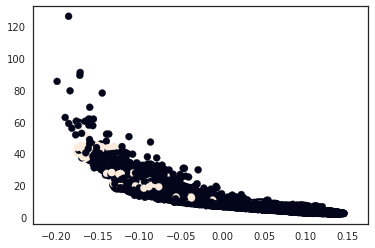

In [83]:
plt.scatter(*proj.T, c=target_train)

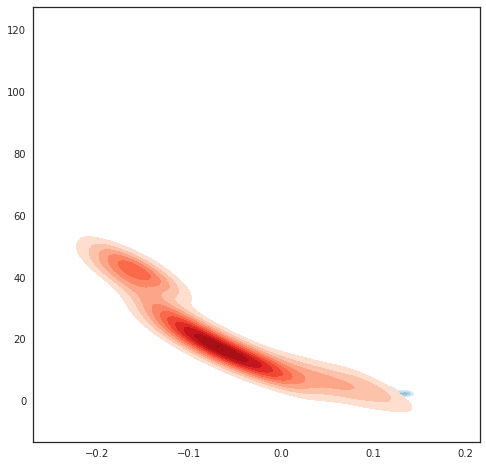

In [91]:
f, ax = plt.subplots(figsize=(8, 8))
#ax.set_aspect("equal")

sns.kdeplot(*proj[target_train == 0].T,
                 cmap="Blues", shade=True, shade_lowest=False, ax=ax)
sns.kdeplot(*proj[target_train == 1].T,
                 cmap="Reds", shade=True, shade_lowest=False, ax=ax)

In [99]:
np.sum(target_train == 1)

293

In [122]:
dbs = DBSCAN(eps=0.5)

In [124]:
dbs.fit(proj[:1000])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [125]:
dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1

In [9]:
umap_transformer = UMAP(n_neighbors=20, n_components=2, min_dist=0.1, random_state=42, verbose=True)

NameError: name 'umap' is not defined